In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ticker = 'AAPL'  #stock
data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
data.head()

C:\Users\Sujal\AppData\Local\Temp\ipykernel_18180\2653670522.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.645676,179.499605,174.425170,174.542947,104487900
2022-01-04,176.378372,179.558489,175.809091,179.254221,99310400
2022-01-05,171.686707,176.839663,171.411883,176.290017,94537600
2022-01-06,168.820633,172.059636,168.467287,169.507691,96904000
2022-01-07,168.987534,170.921120,167.868606,169.694226,86709100


In [5]:
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data[['EMA12', 'EMA26']].head()

Price,EMA12,EMA26
Ticker,,
Date,,
2022-01-03,178.645676,178.645676
2022-01-04,178.296860,178.477727
2022-01-05,177.279913,177.974689
2022-01-06,175.978485,177.296610
2022-01-07,174.902954,176.681123


In [6]:
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()
data[['MACD', 'Signal']].head()

Price,MACD,Signal
Ticker,,
Date,,
2022-01-03,0.000000,0.000000
2022-01-04,-0.180868,-0.036174
2022-01-05,-0.694776,-0.167894
2022-01-06,-1.318125,-0.397940
2022-01-07,-1.778169,-0.673986


In [7]:
data['Histogram'] = data['MACD'] - data['Signal']
data[['Histogram']].head()

Price,Histogram
Ticker,
Date,
2022-01-03,0.000000
2022-01-04,-0.144694
2022-01-05,-0.526882
2022-01-06,-0.920185
2022-01-07,-1.104183


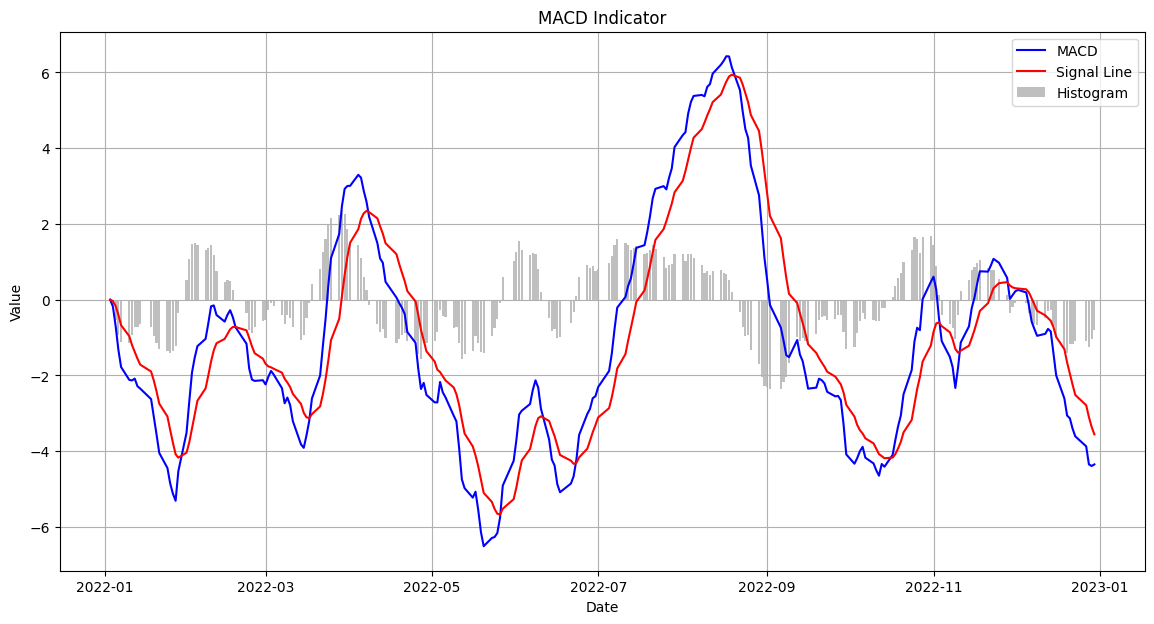

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['MACD'], label='MACD', color='blue')
plt.plot(data.index, data['Signal'], label='Signal Line', color='red')
plt.bar(data.index, data['MACD'] - data['Signal'], label='Histogram', color='gray', alpha=0.5)
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()